In [81]:
import pandas as pd
import matplotlib.pyplot as plt 

plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'retina'
import os

## 1. Read the COVID Data

In [82]:
dir_name  = "./DATA/"
file_name = "COVID19_data.csv"
path_name = dir_name + file_name

COVID_data = pd.read_csv(path_name)

In [83]:
COVID_data

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
0,1,Afghanistan,2019-12-31,0,0,0,0,0,0
1,2,Afghanistan,2020-01-01,0,0,0,0,0,0
2,3,Afghanistan,2020-01-02,0,0,0,0,0,0
3,4,Afghanistan,2020-01-03,0,0,0,0,0,0
4,5,Afghanistan,2020-01-04,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
54517,55096,Zimbabwe,2020-11-02,8389,245,7939,15,2,12
54518,55097,Zimbabwe,2020-11-03,8410,246,7942,21,1,3
54519,55098,Zimbabwe,2020-11-04,8427,248,7967,17,2,25
54520,55099,Zimbabwe,2020-11-05,8444,248,7975,17,0,8


## 2. Read the country and statistic type

In [153]:
country_name    = "US"
statistic_type  = "newDeath" 

In [154]:
COVID_country      = COVID_data.loc[COVID_data['Country']==country_name]
stat_COVID_country = COVID_country[statistic_type]
date_country       = COVID_country['Date']

In [155]:
max_stat_COVID     = stat_COVID_country.max()
ind_max_stat_COVID = stat_COVID_country.idxmax()

## 3. Plot the statistics of COVID 

In [191]:
print("+country_name+""The maximum of "+statistic_type+" is "+str(max_stat_COVID)+
      " people at "+date_country[ind_max_stat_COVID])

The maximum of newDeath in US is 2609 people at 2020-04-15


In [189]:
N_point = 10 

N_date = len(date_country)
date = date_country.values
date_name = date[1:N_date:int(N_date/N_point)]

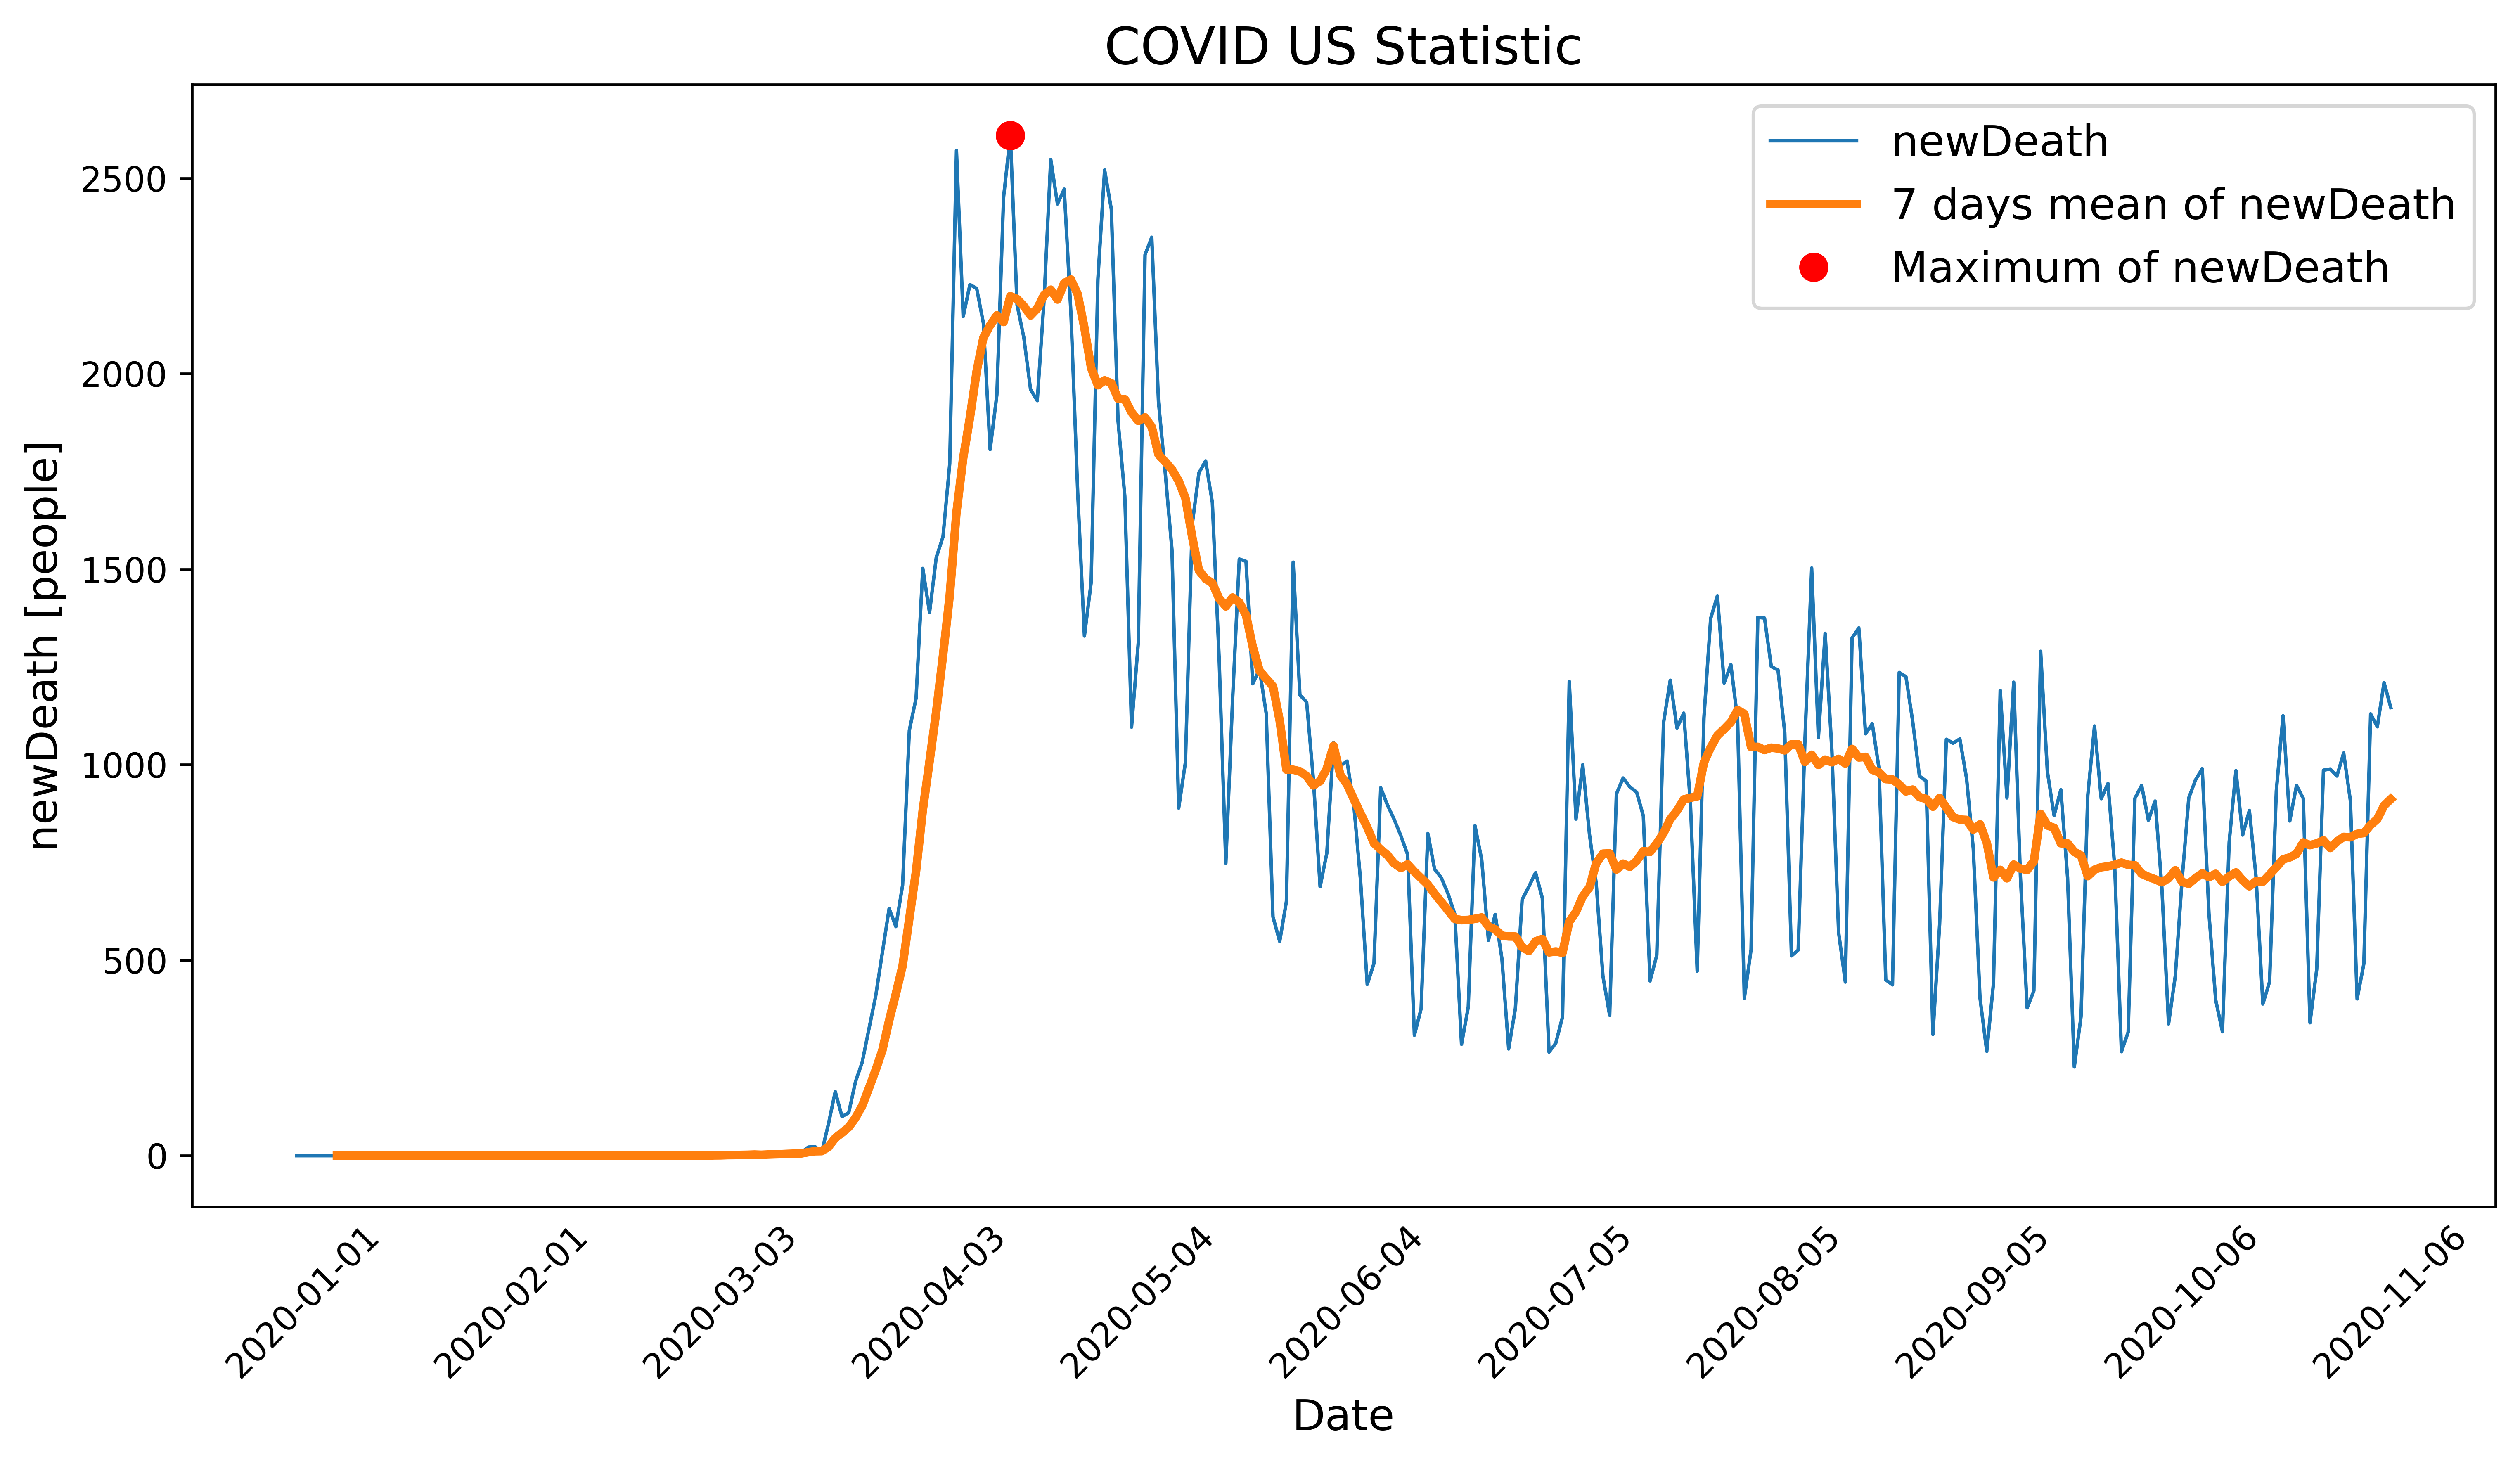

In [190]:
fig, axes = plt.subplots(1,1,figsize=(12,6))

axes.plot(date_country,stat_COVID_country,linewidth=1.,label=statistic_type)
axes.plot(date_country,stat_COVID_country.rolling(7).mean(),
                         linewidth=2.5,label="7 days mean of "+statistic_type)
axes.plot(date_country[ind_max_stat_COVID],max_stat_COVID,
                          "o",markersize=7.5,color='red',label='Maximum of '+statistic_type)

axes.set_title("COVID "+country_name+" Statistic",fontsize=15)
axes.set_xlabel("Date",fontsize=12.5)
axes.set_ylabel(statistic_type+" [people]",fontsize=12.5)
axes.legend(fontsize=12.5)

axes.set_xticks(date_name)
axes.set_xticklabels(date_name,rotation=45)
axes.tick_params(axis='x',which='both',length=0)